In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
ticker=['AAPL','MSFT','FB','GOOG','AMZN']

In [3]:
stock_data=pd.DataFrame()
app_data=[]
for t in ticker:
    dat=yf.download(t,start="2010-01-01", end="2021-06-08",interval = "1d")
    dat['TICKERS']=t
    print (t)
    app_data.append(dat)
    
stock_data=pd.concat(app_data)

[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
MSFT
[*********************100%***********************]  1 of 1 completed
FB
[*********************100%***********************]  1 of 1 completed
GOOG
[*********************100%***********************]  1 of 1 completed
AMZN


In [4]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,TICKERS
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.572422,493729600,AAPL
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.583784,601904800,AAPL
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.479061,552160000,AAPL
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.467082,477131200,AAPL
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.510078,447610800,AAPL


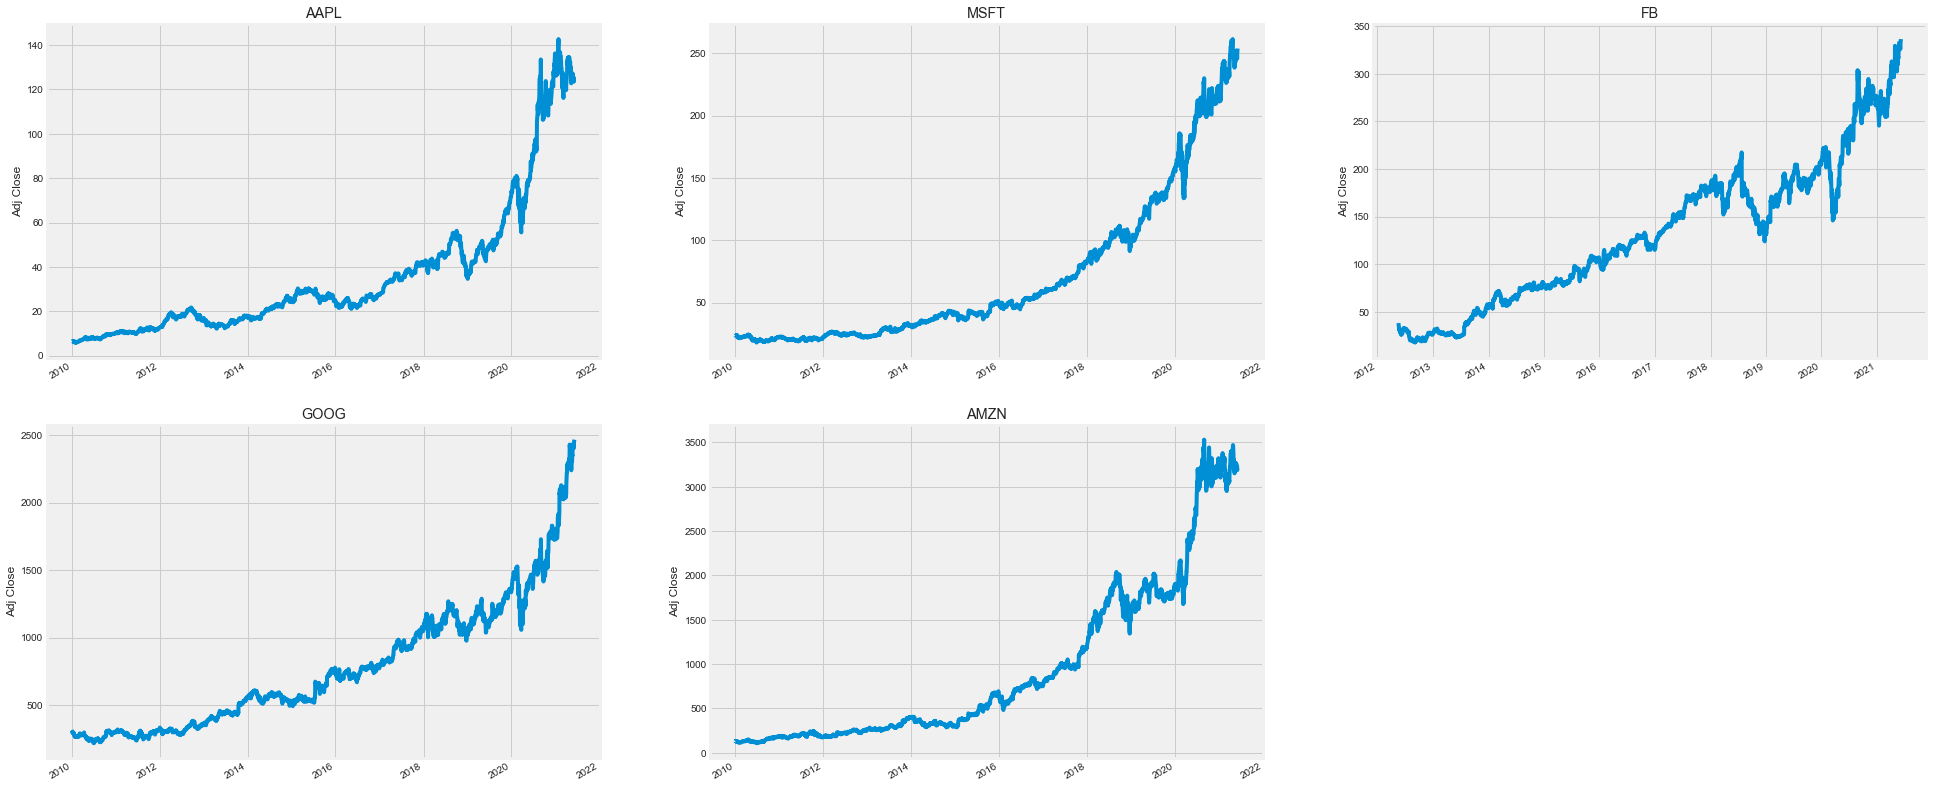

In [5]:
fig = plt.figure(figsize=(30, 15))
for i,t in zip(range(1,6),ticker):
    df=stock_data[stock_data['TICKERS']==t]    
    ax = fig.add_subplot(2,3,i)
    df['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(t)
    i=i+1   

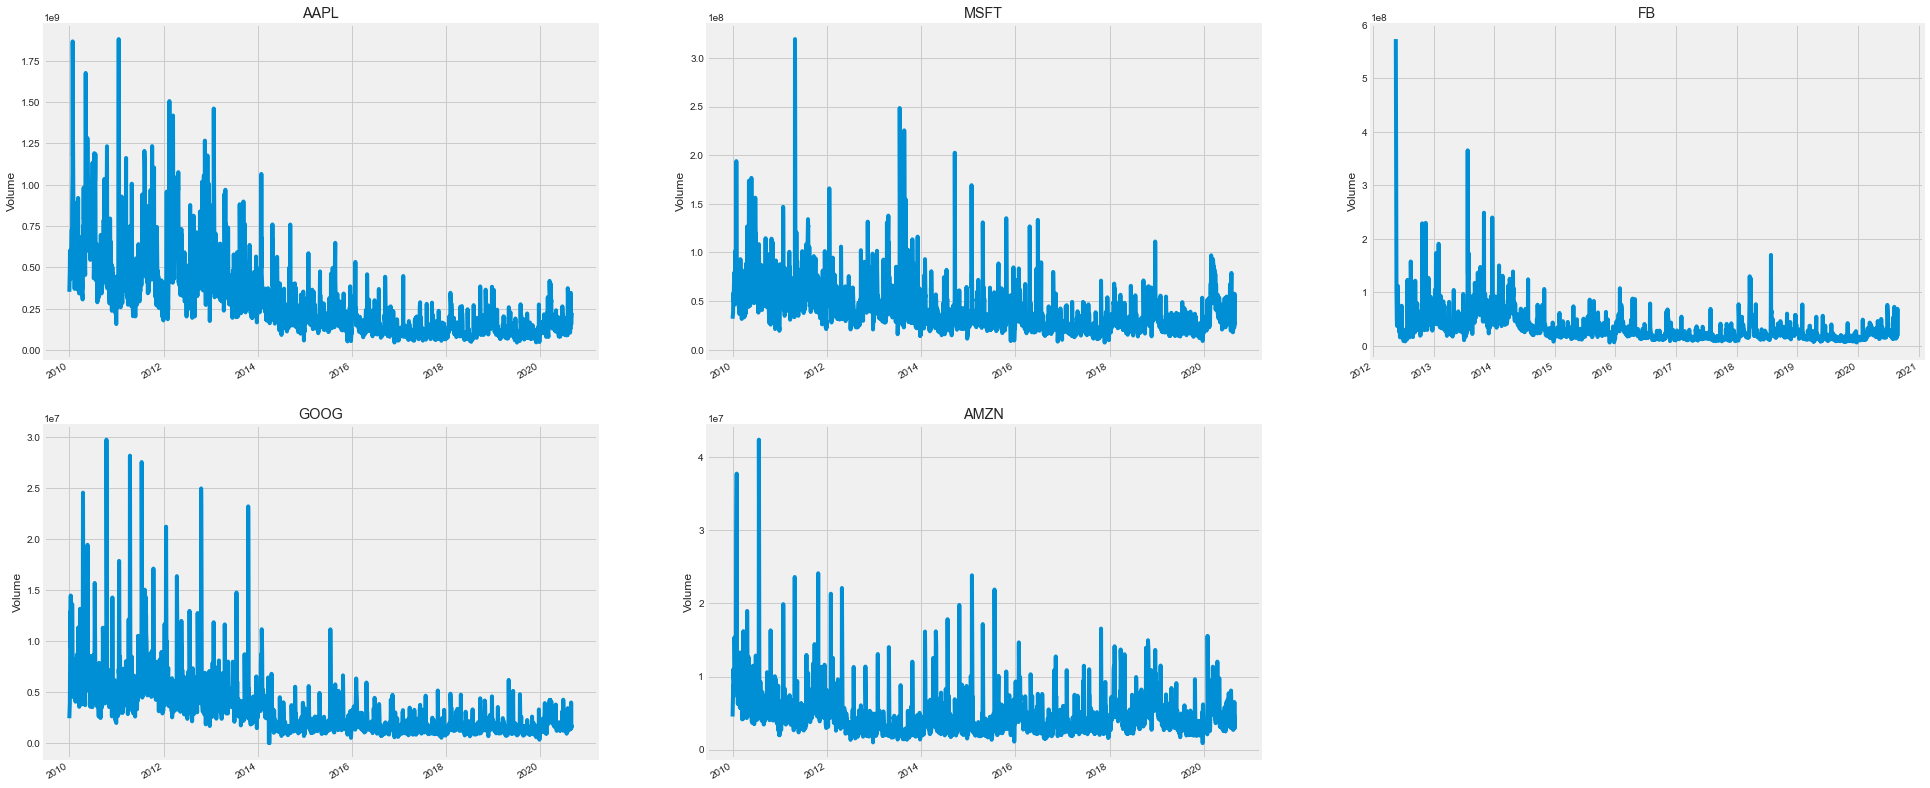

In [7]:
fig = plt.figure(figsize=(30, 15))
for i,t in zip(range(1,6),ticker):
    df=stock_data[stock_data['TICKERS']==t]    
    ax = fig.add_subplot(2,3,i)
    df['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(t)  

TICKERS
AAPL    [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
AMZN    [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
FB      [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
GOOG    [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
MSFT    [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
dtype: object

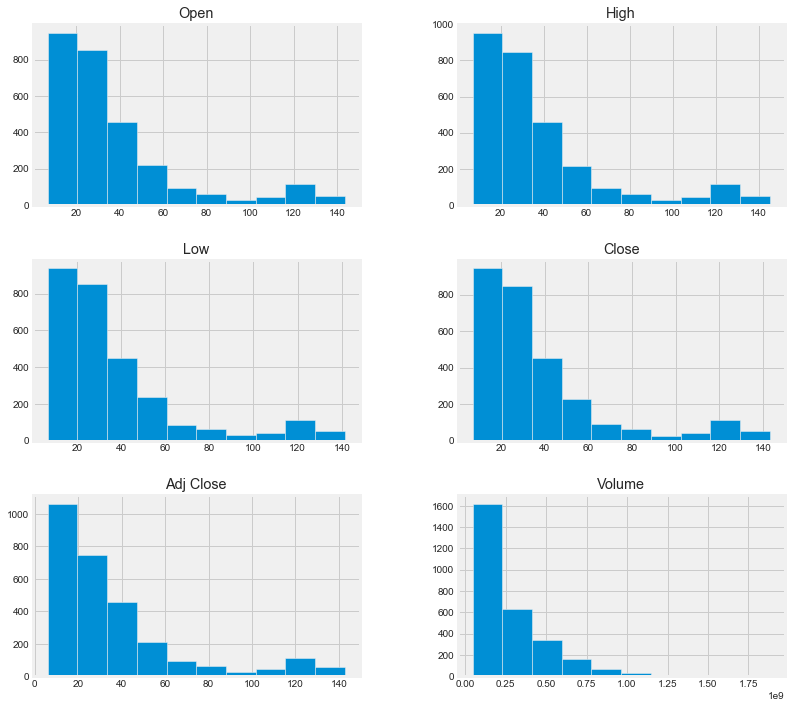

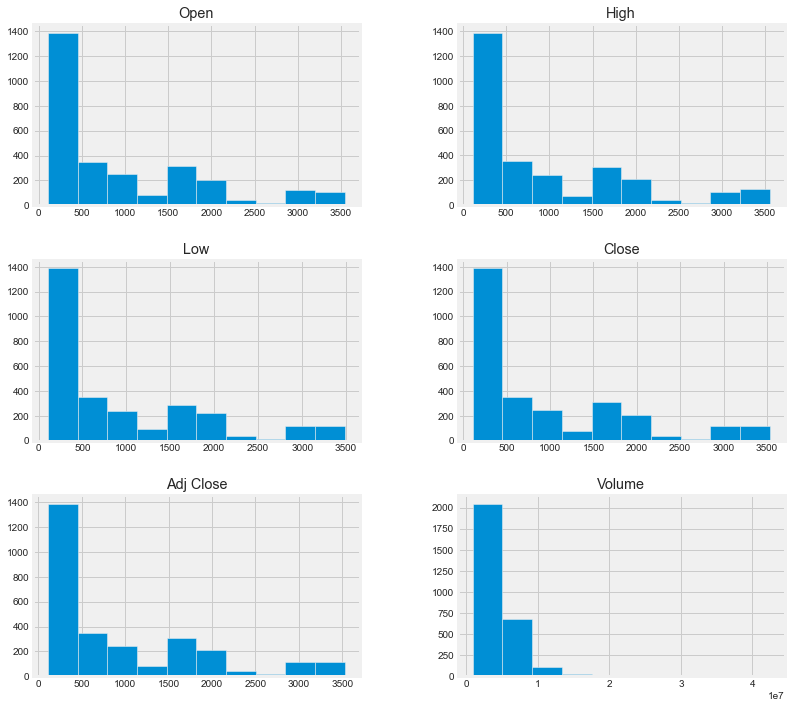

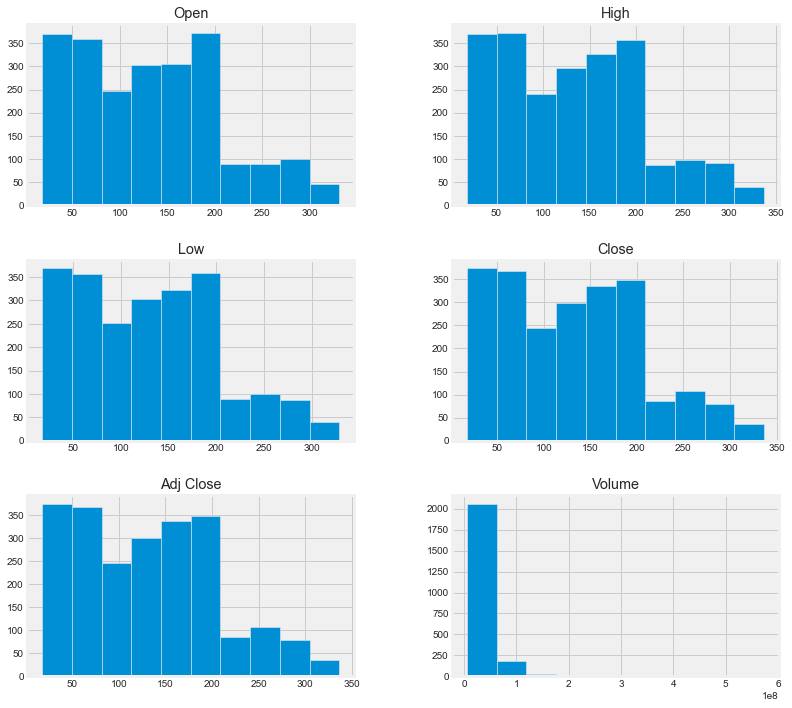

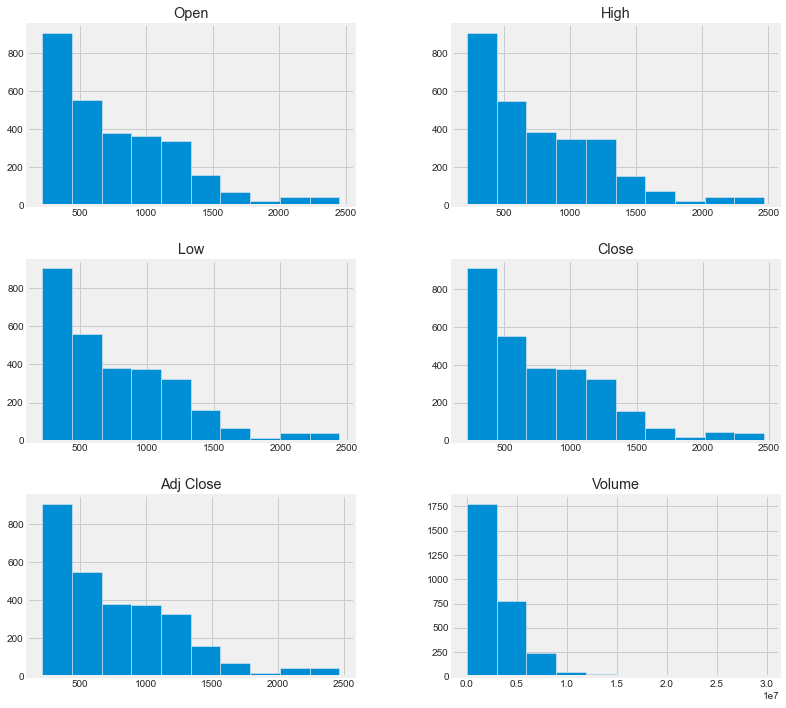

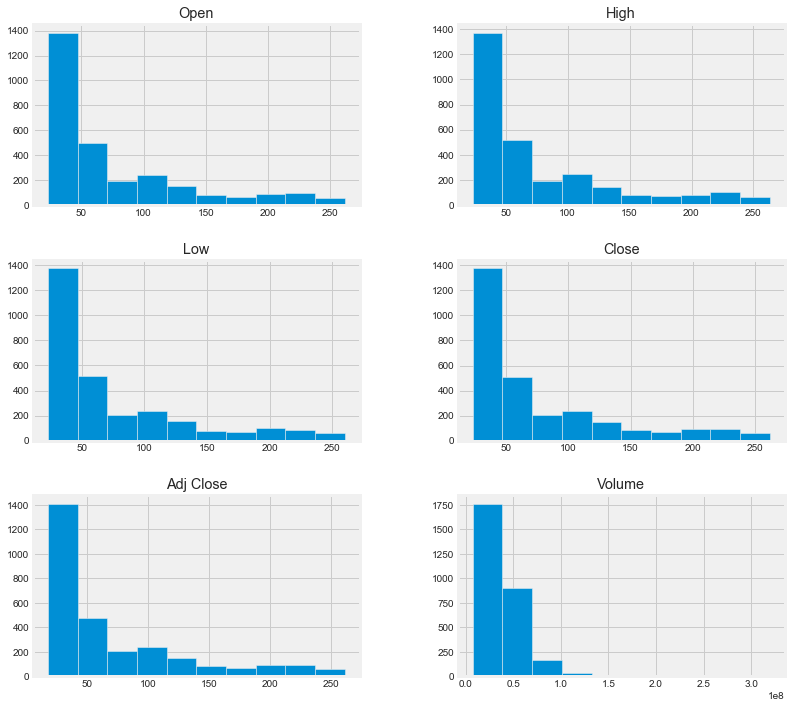

In [6]:
stock_data.groupby("TICKERS").hist(figsize=(12, 12))

### Moving Average 

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses. 
https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp#:~:text=The%20moving%20average%20(MA)%20is,time%20period%20the%20trader%20chooses.

In [7]:
mv_avg=[5,10,20,50]

for ma in mv_avg:
    for t in ticker:
        column_name = f"MA for {ma} days"
        stock_data[column_name] = stock_data['Adj Close'].rolling(ma).mean()

In [8]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,TICKERS,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,,
2021-06-01,3243.500000,3250.979980,3209.060059,3218.649902,3218.649902,2430000,AMZN,3239.208008,3235.587012,3237.868005,3263.966802
2021-06-02,3223.100098,3235.000000,3208.000000,3233.989990,3233.989990,2014500,AMZN,3234.195996,3235.758008,3233.973999,3266.429199
2021-06-03,3204.229980,3214.439941,3184.030029,3187.010010,3187.010010,2398300,AMZN,3218.566016,3231.279004,3229.797498,3267.419399
2021-06-04,3212.000000,3221.000000,3198.810059,3206.219971,3206.219971,2245700,AMZN,3213.787988,3227.133008,3224.789990,3269.802397
2021-06-07,3197.330078,3208.000000,3172.199951,3198.010010,3198.010010,2192400,AMZN,3208.775977,3226.626001,3220.109985,3272.837397


<Figure size 2160x1080 with 0 Axes>

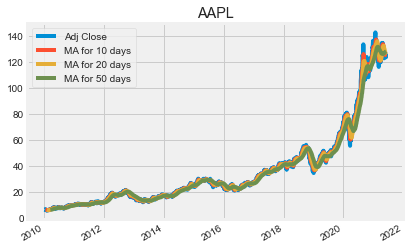

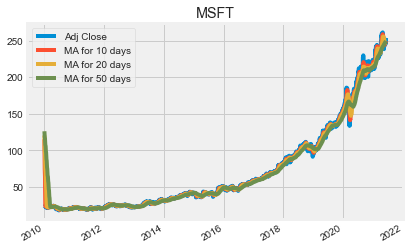

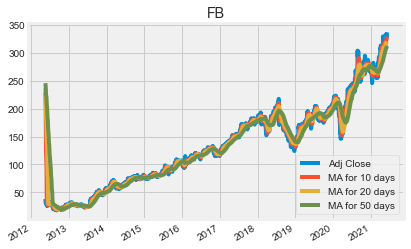

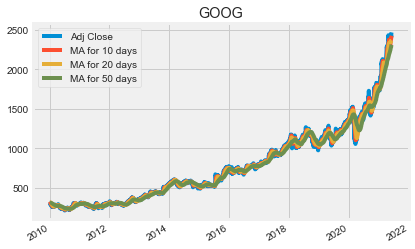

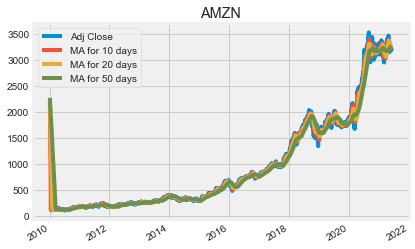

In [9]:
fig = plt.figure(figsize=(30, 15))
for i,t in zip(range(1,6),ticker):
    df=stock_data[stock_data['TICKERS']==t]    
    #ax = fig.add_subplot(2,3,i)
    df[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot()
    plt.xlabel(None)
    plt.title(t)  

Daily Returns

In [10]:
stock_data['Daily Change']=stock_data['Adj Close'].pct_change()

In [11]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,TICKERS,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,Daily Change
Date,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.572422,493729600,AAPL,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.583784,601904800,AAPL,NaN,NaN,NaN,NaN,0.001729
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.479061,552160000,AAPL,NaN,NaN,NaN,NaN,-0.015906
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.467082,477131200,AAPL,NaN,NaN,NaN,NaN,-0.001849
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.510078,447610800,AAPL,6.522485,NaN,NaN,NaN,0.006648


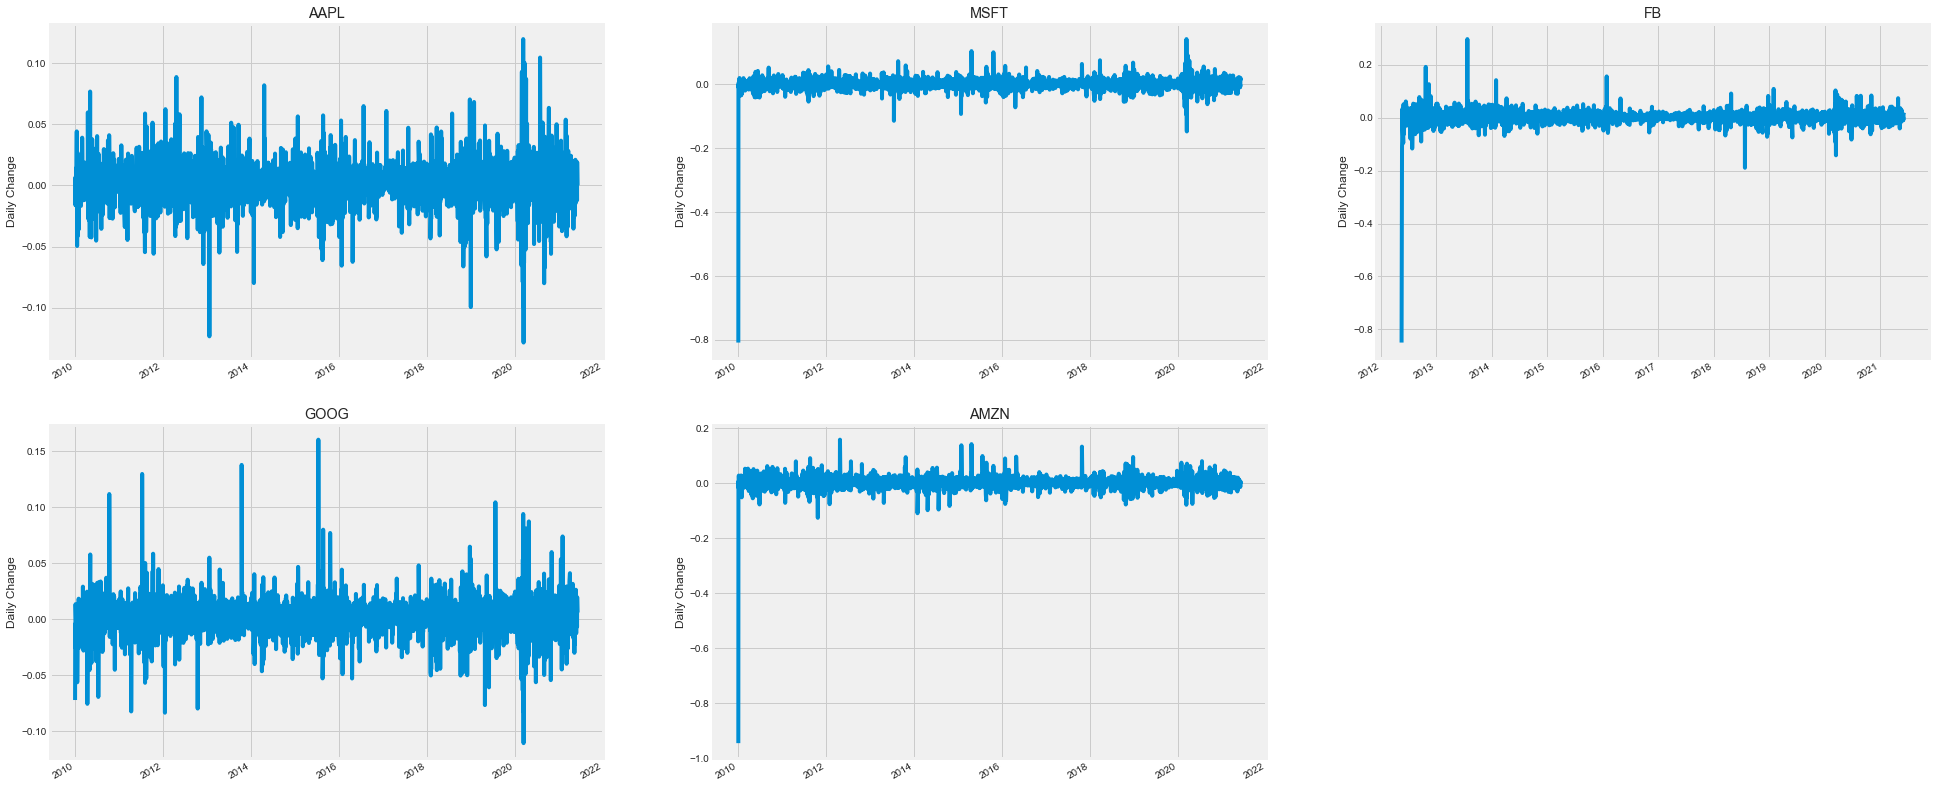

In [12]:
fig = plt.figure(figsize=(30, 15))
for i,t in zip(range(1,6),ticker):
    df=stock_data[stock_data['TICKERS']==t]   
    
    ax = fig.add_subplot(2,3,i)
    df['Daily Change'].plot()
    plt.ylabel('Daily Change')
    plt.xlabel(None)
    plt.title(t)  

In [13]:
close_df=stock_data[['Adj Close','TICKERS','Daily Change']]

In [14]:
close_df.head()

,Adj Close,TICKERS,Daily Change
Date,,,
2010-01-04,6.572422,AAPL,NaN
2010-01-05,6.583784,AAPL,0.001729
2010-01-06,6.479061,AAPL,-0.015906
2010-01-07,6.467082,AAPL,-0.001849
2010-01-08,6.510078,AAPL,0.006648


In [15]:
APPLE=close_df[close_df['TICKERS']=='AAPL']['Daily Change']
GOOG=close_df[close_df['TICKERS']=='GOOG']['Daily Change']
FB=close_df[close_df['TICKERS']=='FB']
AMZN=close_df[close_df['TICKERS']=='AMZN']['Daily Change']
MSFT=close_df[close_df['TICKERS']=='MSFT']['Daily Change']

In [16]:
print (GOOG.shape)
print (APPLE.shape)
print (FB.shape)
print (AMZN.shape)
print (MSFT.shape)

(2876,)
(2876,)
(2277, 3)
(2876,)
(2876,)


In [17]:
corr_df=pd.concat([MSFT,APPLE,AMZN,GOOG],axis=1)

In [18]:
header=['MSFT','APPL','AMZN','GOOG']
corr_df.columns=header
corr_df.head()

,MSFT,APPL,AMZN,GOOG
Date,,,,
2010-01-04,-0.809416,NaN,-0.945704,-0.072420
2010-01-05,0.000323,0.001729,0.005900,-0.004404
2010-01-06,-0.006137,-0.015906,-0.018116,-0.025209
2010-01-07,-0.010400,-0.001849,-0.017013,-0.023280
2010-01-08,0.006897,0.006648,0.027077,0.013331


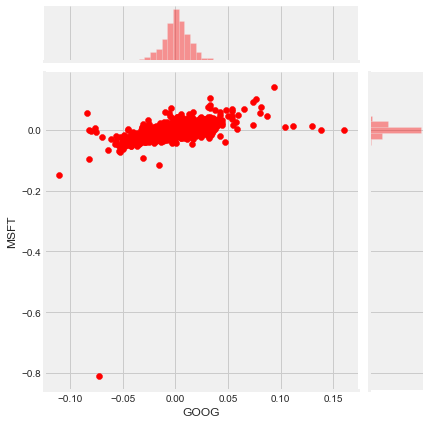

In [19]:
sns.jointplot('GOOG','MSFT',corr_df, kind='scatter', color='red')

          MSFT      APPL      AMZN      GOOG
MSFT  1.000000  0.562429  0.746792  0.500677
APPL  0.562429  1.000000  0.455010  0.528012
AMZN  0.746792  0.455010  1.000000  0.483599
GOOG  0.500677  0.528012  0.483599  1.000000


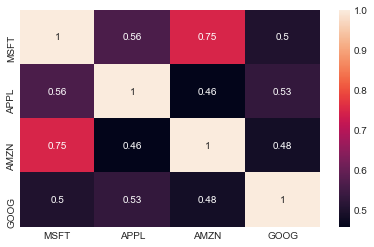

In [20]:
corrMatrix = corr_df.corr()
print (corrMatrix)

sns.heatmap(corrMatrix, annot=True)
plt.show()

### How much value do we put at risk by investing in a particular stock? 

The standard deviation is often used by investors to measure the risk of a stock or a stock portfolio. The basic idea is that the standard deviation is a measure of volatility: the more a stock's returns vary from the stock's average return, the more volatile the stock.

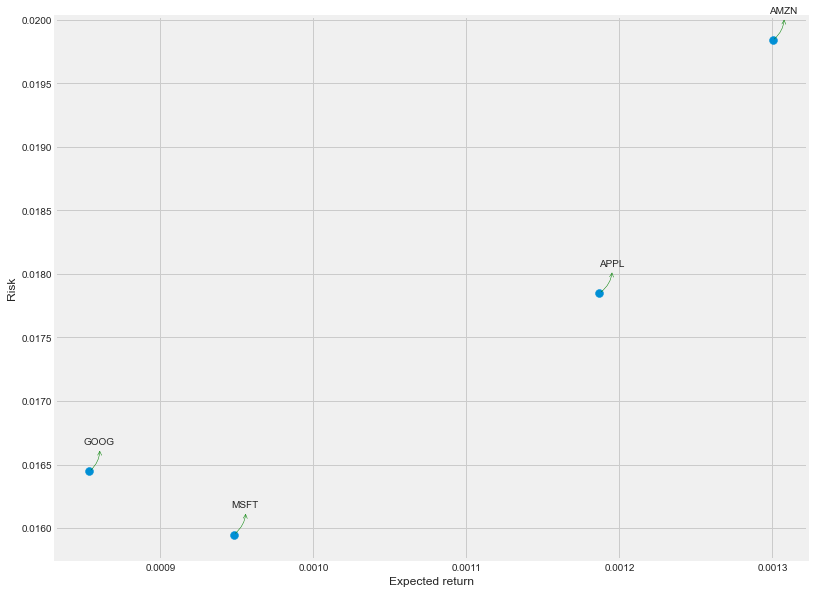

In [21]:
rets = corr_df.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(25, 25), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='<-', color='green', connectionstyle='arc3,rad=-0.3'))

### Predicting the closing price stock price of APPLE inc 

APPLE is part of NASDAQ 100 Index, S&P 500 Index and DOW30 Index

In [22]:
df_app=yf.download('AAPL',start="2010-01-01", end="2021-09-04",interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [23]:
df_app.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.572422,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.583784,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.479061,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.467082,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.510078,447610800


In [24]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2877 entries, 2010-01-04 to 2021-06-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2877 non-null   float64
 1   High       2877 non-null   float64
 2   Low        2877 non-null   float64
 3   Close      2877 non-null   float64
 4   Adj Close  2877 non-null   float64
 5   Volume     2877 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 157.3 KB


In [25]:
df_app.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2.877000e+03
mean,37.329028,37.715479,36.931154,37.335766,35.633833,2.795926e+08
std,30.128374,30.500951,29.716945,30.117460,30.604254,2.274706e+08
min,6.870357,7.000000,6.794643,6.858929,5.898012,4.544800e+07
25%,17.952856,18.120358,17.807858,17.932858,15.755876,1.151172e+08
50%,27.537500,27.857500,27.227501,27.487499,25.490513,1.957936e+08
75%,44.474998,44.847500,44.067501,44.505001,42.961842,3.822748e+08
max,143.600006,145.089996,141.369995,143.160004,142.704010,1.880998e+09


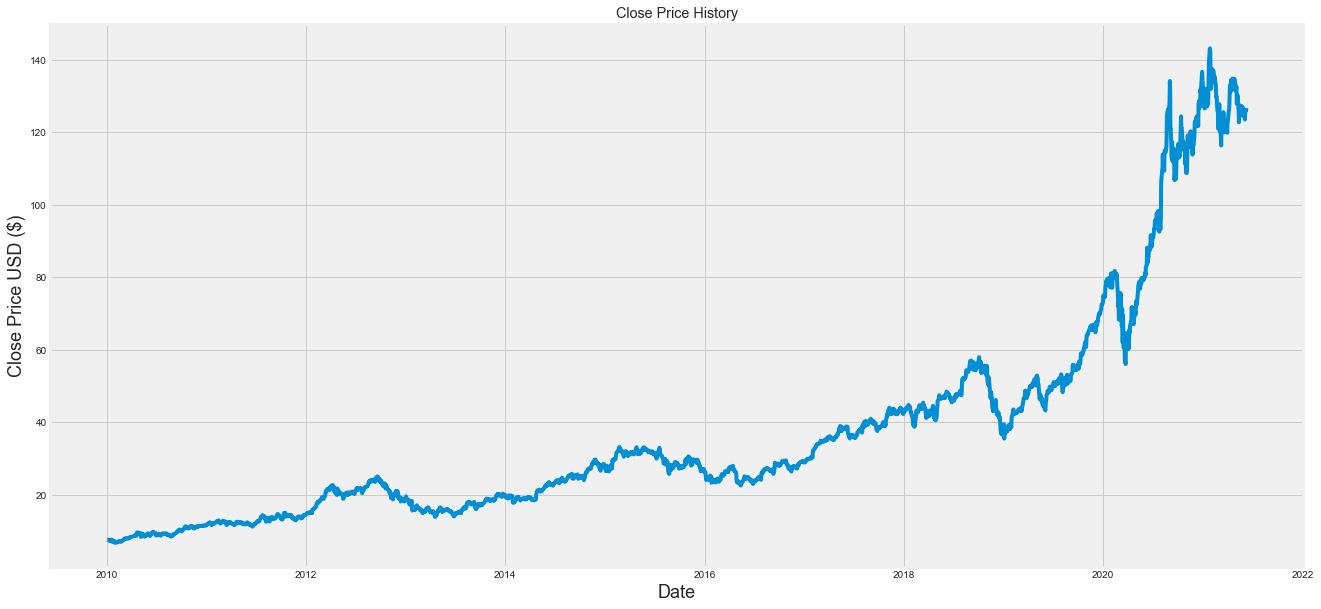

In [26]:
plt.figure(figsize=(20,10))
plt.title('Close Price History')
plt.plot(df_app['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [27]:
df=df_app[['Close']]
df.head()
data=df.values

In [28]:
t_len=int(len(data)*0.8)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.00575406],
       [0.00585102],
       [0.00495751],
       ...,
       [0.87329517],
       [0.87336855],
       [0.87953135]])

The look_back, which is the number of previous time steps to use as input variables to predict the next time period. In this iteration we use 30 as the lookback.
x_train - training data is split into small block of 

In [30]:
#Create the scaled training data set
train_data = scaled_data[0:int(t_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

[array([5.75406373e-03, 5.85101519e-03, 4.95751056e-03, 4.85531498e-03,
       5.22215135e-03, 4.73217092e-03, 4.10592389e-03, 4.87365715e-03,
       4.55398986e-03, 3.63690244e-03, 6.02394863e-03, 5.15665060e-03,
       4.19763123e-03, 1.49353806e-03, 2.88751135e-03, 3.63952275e-03,
       4.14785234e-03, 1.89705527e-03, 2.61681132e-06, 7.02222017e-04,
       9.98310019e-04, 1.88133341e-03, 0.00000000e+00, 8.93497630e-04,
       5.42386622e-04, 1.08478024e-03, 8.04410598e-04, 1.73459956e-03,
       2.18266553e-03, 2.97398157e-03])]
[0.0027512622432528944]

[array([5.75406373e-03, 5.85101519e-03, 4.95751056e-03, 4.85531498e-03,
       5.22215135e-03, 4.73217092e-03, 4.10592389e-03, 4.87365715e-03,
       4.55398986e-03, 3.63690244e-03, 6.02394863e-03, 5.15665060e-03,
       4.19763123e-03, 1.49353806e-03, 2.88751135e-03, 3.63952275e-03,
       4.14785234e-03, 1.89705527e-03, 2.61681132e-06, 7.02222017e-04,
       9.98310019e-04, 1.88133341e-03, 0.00000000e+00, 8.93497630e-04,
       5.

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=100)

Epoch 1/100


ValueError: in user code:

    C:\Users\vidya\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\vidya\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\vidya\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\vidya\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\vidya\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\vidya\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\vidya\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\vidya\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\vidya\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\input_spec.py:176 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [1, 30]


In [31]:
import tensorflow as tf